# Flanger DQAF

The proposed blueprint for automated DQAF for statistical and computational biases in data. The blueprint docs are available [here](https://docs.google.com/document/d/17_8Nifh7VPjZB_C6swgxp6G0DSfryZWdpwxDIkOavMM/edit?usp=sharing).

## 1. Data Ingestion and Preprocessing

### 1.1 Importing Libraries

In [36]:
!pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Loading the dataset

We can ensure data format standardization and data type validation by loading the data into a pandas dataframe and utf-8 encoding.

In [2]:
df = pd.read_csv('dataset\Bank_Personal_Loan_Modelling.csv', encoding='utf-8')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Next, we ensure the correct data types for each column.

In [3]:
df = df.astype({
    'ID': 'int64',
    'Age': 'int64',
    'Experience': 'int64',
    'Income': 'float64',
    'ZIP Code': 'int64',
    'Family': 'int64',
    'CCAvg': 'float64',
    'Education': 'int64',
    'Mortgage': 'float64',
    'Personal Loan': 'int64',
    'Securities Account': 'int64',
    'CD Account': 'int64',
    'Online': 'int64',
    'CreditCard': 'int64'
})
df.dtypes


ID                      int64
Age                     int64
Experience              int64
Income                float64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage              float64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### 1.3 Handle Missing Values

In [4]:
# Calculate the percentage of missing values in each feature
missing_values = df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: float64)

This dataset has no missing values. However, we can handle missing values by utilizing the MICE algorithm or by imputing the missing values with the mean, median, or mode.

In [5]:
# Sample MICE algorithm to impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the IterativeImputer class
mice_imputer = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

# Fit the imputer on the dataset
mice_imputer.fit(df)

# Impute the missing values in the dataset
df_imputed = mice_imputer.transform(df)

# Convert the Numpy array back into a Pandas DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# Check for missing values in the imputed DataFrame
missing_values = df_imputed.isnull().mean() * 100
missing_values = missing_values[missing_values > 0]
missing_values

Series([], dtype: float64)

Text(0.5, 1.0, 'Original Income Distribution')

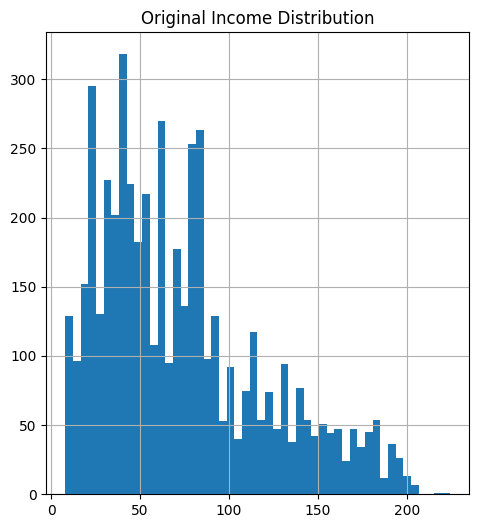

In [6]:
# Check the distribution of the 'Income' feature before and after imputation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['Income'].hist(bins=50)
plt.title('Original Income Distribution')


***NOTE***: The above imputation methods can only be used for MCAR and MAR missing data. MNAR data requires careful handling and domain knowledge, which can largely not be automated. This requires a socio-technical intervention.

## 2. Exploratory Data Analysis (EDA)

### 2.1 Univariate Analysis

In [7]:
# Calculating the descriptive statistics of the dataset.
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


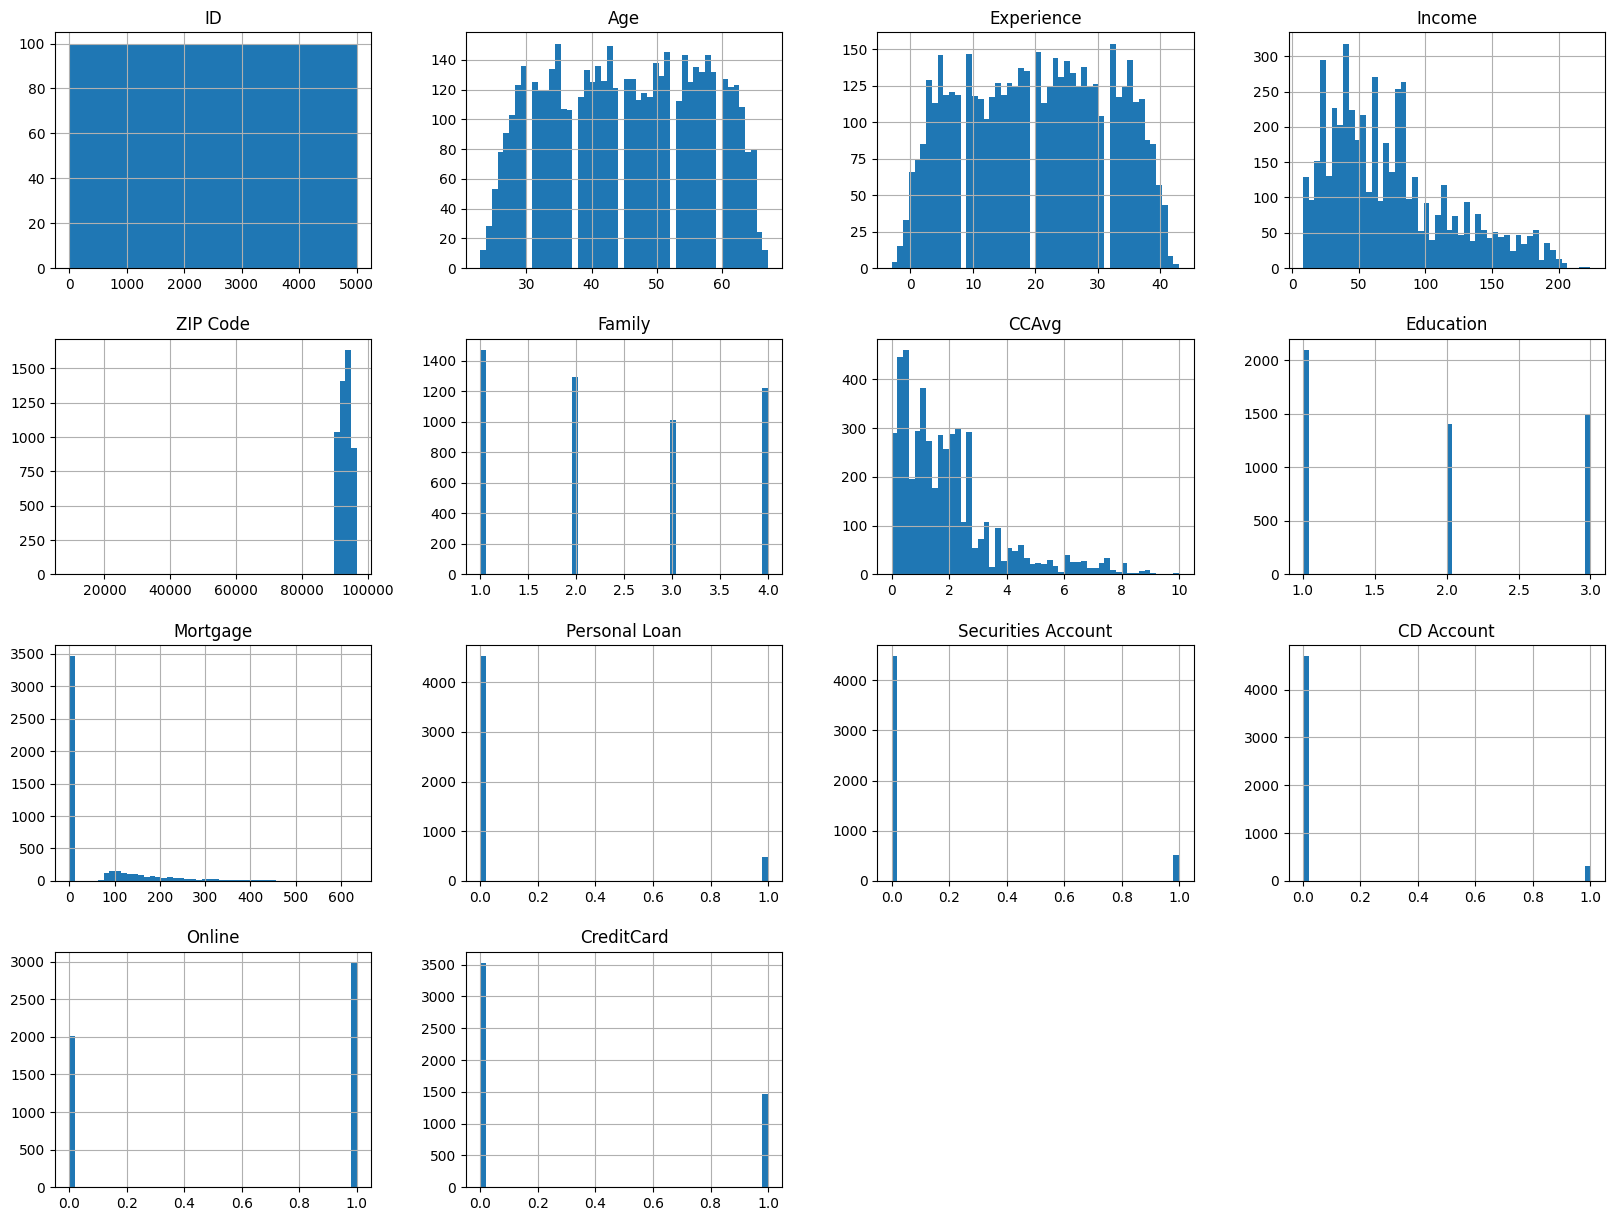

In [8]:
# Generate histograms and kernel density estimates for continuous variables
df.hist(bins=50, figsize=(20, 15))
plt.show()

Bar plots can be used to visualize the distribution of the categorical variables.

### 2.2 Bivariate Analysis

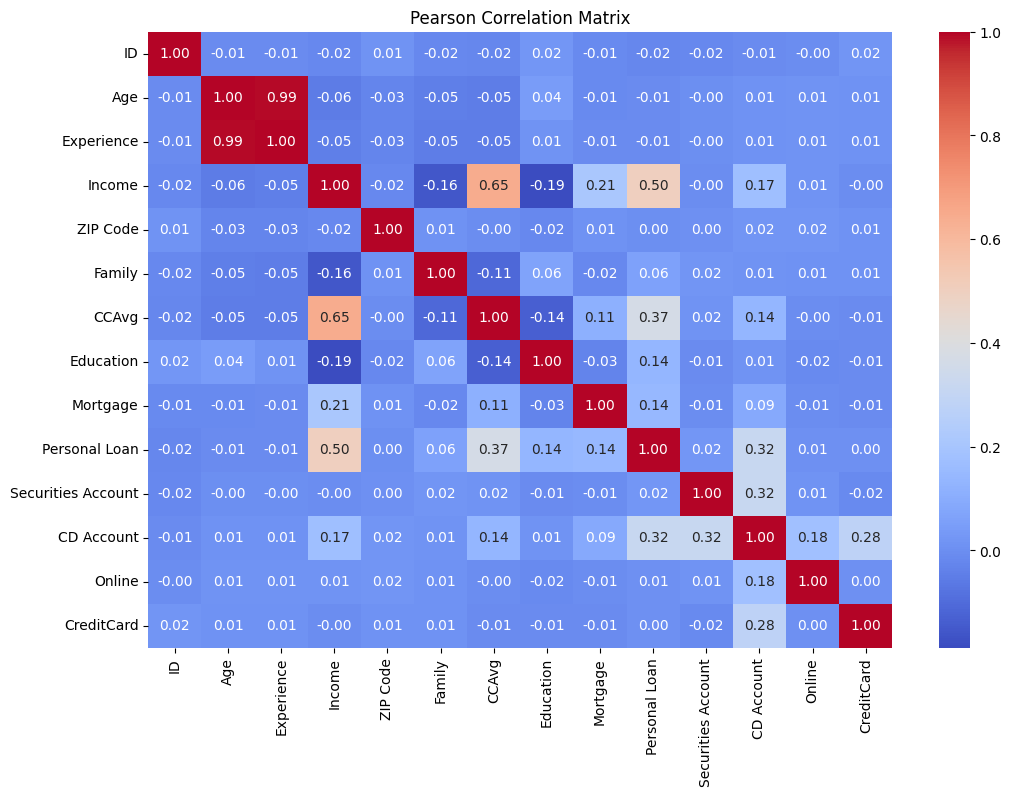

In [9]:
# Compute correlation matrices (Pearson, Spearman, Kendall's Tau)
correlation_pearson = df.corr(method='pearson')

# Plot the Pearson correlation matrix
plt.figure(figsize=(12, 8))
plt.title('Pearson Correlation Matrix')
sns.heatmap(correlation_pearson, annot=True, cmap='coolwarm', fmt=".2f")


plt.show()

### 2.3. Multivariate Analysis

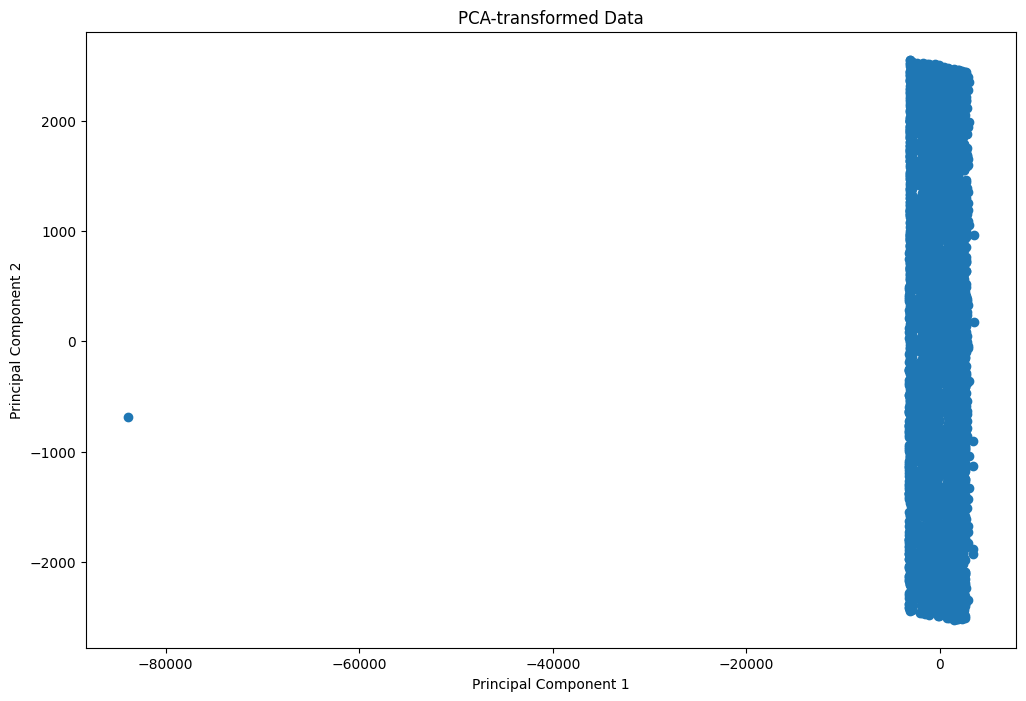

In [10]:
# Perform principal component analysis (PCA)
from sklearn.decomposition import PCA

# Create an instance of the PCA class
pca = PCA(n_components=2)

# Fit the PCA model on the dataset
pca.fit(df_imputed)

# Transform the dataset using the learned model
df_pca = pca.transform(df_imputed)

# Convert the Numpy array back into a Pandas DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# Display the first few rows of the PCA-transformed DataFrame
df_pca.head()

# Visualize the PCA-transformed data
plt.figure(figsize=(12, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA-transformed Data')
plt.show()


c:\Users\yashy\OneDrive\Documents\Coding Projects\Non-Trivial\Flanger-DQAF\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


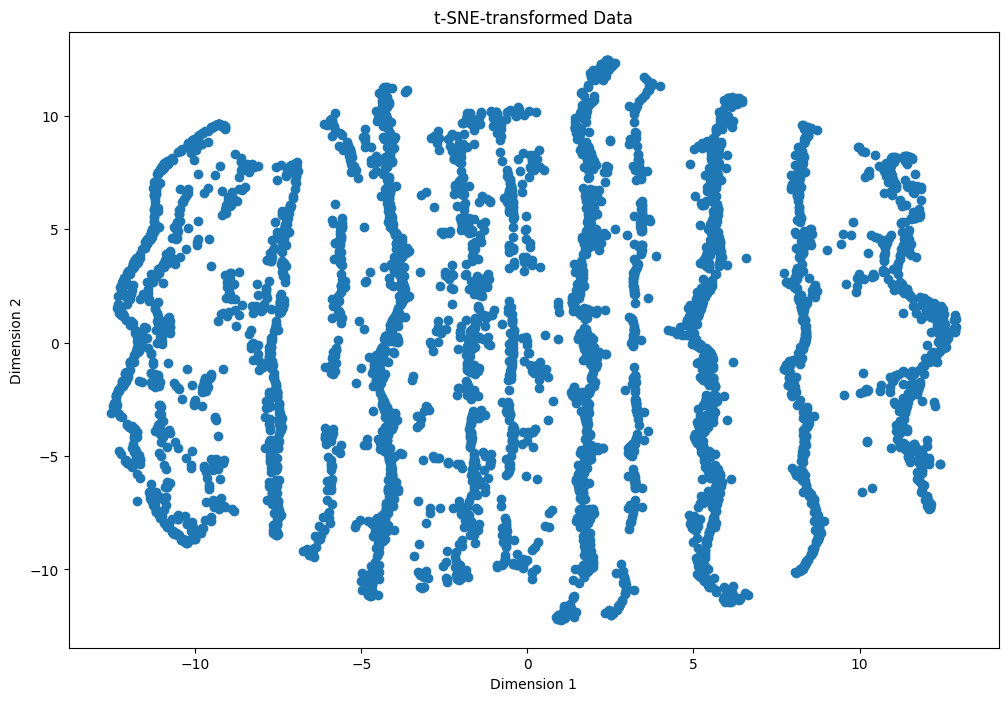

In [11]:
# Perform t-distributed Stochastic Neighbor Embedding (t-SNE)
from sklearn.manifold import TSNE

# Create an instance of the TSNE class
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)

# Fit the TSNE model on the dataset
df_tsne = tsne.fit_transform(df)

# Convert the Numpy array back into a Pandas DataFrame
df_tsne = pd.DataFrame(df_tsne, columns=['Dimension 1', 'Dimension 2'])

# Display the first few rows of the t-SNE-transformed DataFrame
df_tsne.head()

# Visualize the t-SNE-transformed data
plt.figure(figsize=(12, 8))
plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE-transformed Data')
plt.show()

## 3. Sampling Bias Detection

### 3.1 Compare sample statistics to known population parameters
